#### Using Python Kernal 3.11.3
#### Dataset: Global Superstore Orders 2016
<h3>PHASE 1: Data Filteration</h3>
<ol>
    <li>Importing Required Libraries and Read the data</li>
    <li>Removing redundant attributes and Managing NaN Values</li>
    <li>Segregation of data into different parts</li>
</ol> 
<p>Here, 'Row ID' is used as Primary Attribute (Primary Key)</p>

<H3 style='font-weight:bold;'>1.1 Importing Required Libraries and modules</H3>

##### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import random
import statistics
import math

##### <U>Reading CSV data</U>

##### The data is stored in CSV file: 'Global Superstore Orders 2016.csv'

In [3]:
#original CSV file
rawData = pd.read_csv("Global Superstore Orders 2016.csv")
rawData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-14,13-11-14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,05-02-14,07-02-14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,17-10-14,18-10-14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,28-01-14,30-01-14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,05-11-14,06-11-14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [306]:
rawData.describe()

,Row ID,Postal Code,Quantity,Discount,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [307]:
print("Column Names:")
print(rawData.columns.tolist())

Column Names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


<H3 style='font-weight:bold;'>1.2 Removing Redundant Attributes and Handling NaN (or NULL) values</H3>

##### Creating a copy of original data to perform opeations <br>- Removing columns having sensitive informations<br>- Removing the attributes having multiple NaN values on rows. 

In [38]:
df = rawData.copy()
df.drop(['Customer Name', 'Postal Code', 'Customer ID', 'Customer ID', ], axis=1, inplace=True) # axis = 1 for columns and axis=0 for row selection
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-14,13-11-14,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,05-02-14,07-02-14,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical


##### Removing Redundant Attributes 
('Row ID' can be replaced with 'Order ID' for Primary key)<br>
('Product Name' has distinct data hence, so we can select 'Category' for grouping the data)<br> 
('Product ID' is not more affecting the dataset)

In [16]:
df.drop(['Order ID', 'Product ID'], axis=1, inplace=True)
df.head(3)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,11-11-14,13-11-14,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,05-02-14,07-02-14,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,17-10-14,18-10-14,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium


<H3 style='font-weight:bold;'>1.3 Data Segregation</H3>

##### Grouping the data According to different sectors and writing into different CSV file for future analysis

<p style='font-weight:bold; font-size:20px;'>Shipment Details</p>

In [28]:
ShipmentDetails = df[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'City', 'State', 'Country']]
print(ShipmentDetails.head())
ShipmentDetails.to_csv('ShipmentDetails.csv')

   Row ID Order Date Ship Date     Ship Mode  Shipping Cost           City   
0   40098   11-11-14  13-11-14   First Class          40.77  Oklahoma City  \
1   26341   05-02-14  07-02-14  Second Class         923.63     Wollongong   
2   25330   17-10-14  18-10-14   First Class         915.49       Brisbane   
3   13524   28-01-14  30-01-14   First Class         910.16         Berlin   
4   47221   05-11-14  06-11-14      Same Day         903.04          Dakar   

             State        Country  
0         Oklahoma  United States  
1  New South Wales      Australia  
2       Queensland      Australia  
3           Berlin        Germany  
4            Dakar        Senegal  


<p style='font-weight:bold; font-size:20px;'>Product Details</p>

In [34]:
productDetails = df[['Row ID','Product Name', 'Category', 'Sub-Category', 'Order Priority']]
productDetails.to_csv('productDetails.csv')
productDetails.head()

,Row ID,Product Name,Category,Sub-Category,Order Priority
0,40098,Samsung Convoy 3,Technology,Phones,High
1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,Critical
2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,Medium
3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,Medium
4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,Critical


<p style='font-weight:bold; font-size:20px;'>Product-Wise Sales Record</p>

In [36]:
productWiseSales = df[['Row ID', 'Product Name', 'Category', 'Sub-Category', 'Order Priority', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]
productWiseSales.to_csv('produceWiseSales.csv')
productWiseSales.head(10)

,Row ID,Product Name,Category,Sub-Category,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost
0,40098,Samsung Convoy 3,Technology,Phones,High,$221.98,2,0.0,$62.15,40.77
1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,Critical,"$3,709.40",9,0.1,-$288.77,923.63
2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,Medium,"$5,175.17",9,0.1,$919.97,915.49
3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,Medium,"$2,892.51",5,0.1,-$96.54,910.16
4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,Critical,"$2,832.96",8,0.0,$311.52,903.04
5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,Critical,"$2,862.68",5,0.1,$763.28,897.35
6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,Critical,"$1,822.08",4,0.0,$564.84,894.77
7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,High,"$5,244.84",6,0.0,$996.48,878.38
8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,High,$341.96,2,0.0,$54.71,25.27
9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,High,$48.71,1,0.2,$5.48,11.13


<p style='font-weight:bold; font-size:20px;'>Overall Sales in Different Regions</p>

In [37]:
regionalSales = df[['Row ID', 'Product Name', 'Category', 'Sub-Category', 'Order Priority', 'Country', 'Region', 'Sales', 'Quantity']]
regionalSales.to_csv('regionalSales.csv')
regionalSales.head(10)

,Row ID,Product Name,Category,Sub-Category,Order Priority,Country,Region,Sales,Quantity
0,40098,Samsung Convoy 3,Technology,Phones,High,United States,Central US,$221.98,2
1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,Critical,Australia,Oceania,"$3,709.40",9
2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,Medium,Australia,Oceania,"$5,175.17",9
3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,Medium,Germany,Western Europe,"$2,892.51",5
4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,Critical,Senegal,Western Africa,"$2,832.96",8
5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,Critical,Australia,Oceania,"$2,862.68",5
6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,Critical,New Zealand,Oceania,"$1,822.08",4
7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,High,New Zealand,Oceania,"$5,244.84",6
8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,High,United States,Central US,$341.96,2
9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,High,United States,Western US,$48.71,1


<p style='font-weight:bold; font-size:20px;'>Product-wise Profit on sales</p>

In [38]:
produceWiseProfit = df[['Row ID', 'Product Name', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']]
produceWiseProfit.to_csv('produceWiseProfit.csv')
produceWiseProfit.head(10)

,Row ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,40098,Samsung Convoy 3,Technology,Phones,$221.98,2,0.0,$62.15
1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,"$3,709.40",9,0.1,-$288.77
2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,"$5,175.17",9,0.1,$919.97
3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,"$2,892.51",5,0.1,-$96.54
4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,"$2,832.96",8,0.0,$311.52
5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,"$2,862.68",5,0.1,$763.28
6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,"$1,822.08",4,0.0,$564.84
7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,"$5,244.84",6,0.0,$996.48
8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,$341.96,2,0.0,$54.71
9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,$48.71,1,0.2,$5.48


<p style='font-weight:bold; font-size:20px;'>Order Details for the year 2016</p>

In [40]:
orderDetails = df[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'City', 'State', 'Country', 'Sales']]
orderDetails.to_csv('orderDetails.csv')
orderDetails.head()

,Row ID,Order Date,Ship Date,Ship Mode,Shipping Cost,City,State,Country,Sales
0,40098,11-11-14,13-11-14,First Class,40.77,Oklahoma City,Oklahoma,United States,$221.98
1,26341,05-02-14,07-02-14,Second Class,923.63,Wollongong,New South Wales,Australia,"$3,709.40"
2,25330,17-10-14,18-10-14,First Class,915.49,Brisbane,Queensland,Australia,"$5,175.17"
3,13524,28-01-14,30-01-14,First Class,910.16,Berlin,Berlin,Germany,"$2,892.51"
4,47221,05-11-14,06-11-14,Same Day,903.04,Dakar,Dakar,Senegal,"$2,832.96"


#### Using Python Kernal 3.11.3
#### Dataset: Global Superstore Orders 2016
<h3>PHASE 2: Data Visualisation</h3>
<ol>
    <li>Importing Required Libraries and Read the data</li>
    <li>Grouping the data for visualisation</li>
    <li>Analysis of Visualised Data</li>
</ol> 
<p>Here, 'Row ID' is used as Primary Attribute (Primary Key)</p>

<H3 style='font-weight:bold;'>2.1 Importing Required Libraries and modules</H3>

##### Importing required libraries

In [297]:
import numpy as np
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

### 2.1.1 Total Sales by Category

In [6]:
df = pd.read_csv('productWiseSales.csv')
df.head(5)

,Row ID,Product Name,Category,Sub-Category,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost
0,40098,Samsung Convoy 3,Technology,Phones,High,$221.98,2,0.0,$62.15,40.77
1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,Critical,"$3,709.40",9,0.1,($288.77),923.63
2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,Medium,"$5,175.17",9,0.1,$919.97,915.49
3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,Medium,"$2,892.51",5,0.1,($96.54),910.16
4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,Critical,"$2,832.96",8,0.0,$311.52,903.04


##### Grouping the data according to category

In [7]:
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
total_sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
total_sales_by_category.head()

,Category,Sales
0,Furniture,4110453.03
1,Office Supplies,3787495.46
2,Technology,4744558.76


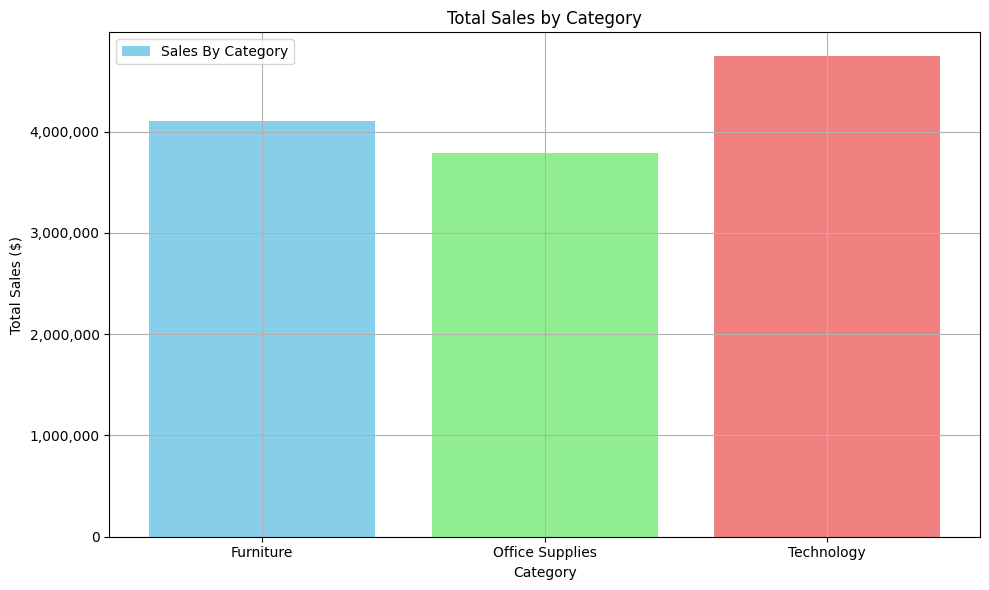

In [24]:
import matplotlib.pyplot as plt

# Ensuring the plotting library is correctly set up for IPython (Jupyter notebooks, etc.)
%matplotlib inline

# Data for plotting
categories = total_sales_by_category['Category']
sales = total_sales_by_category['Sales']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, sales, color=['skyblue', 'lightgreen', 'lightcoral'], label = 'Sales By Category')

# Add titles and labels
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
# plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.legend()
plt.tight_layout()
# Show the chart
plt.show()

##### Grouping the data according to sub-category

In [25]:
total_sales_by_subCategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
total_sales_by_subCategory.head()

,Sub-Category,Sales
0,Accessories,749237.28
1,Appliances,1010535.76
2,Art,371613.70
3,Binders,461870.09
4,Bookcases,1466572.55


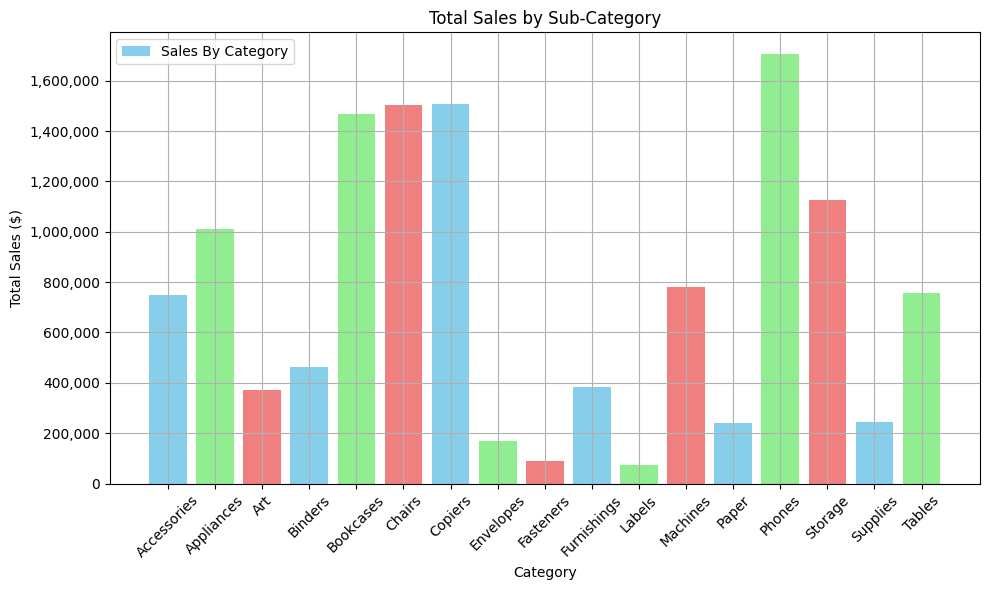

In [33]:
# Data for plotting
subcategories = total_sales_by_subCategory['Sub-Category']
sales = total_sales_by_subCategory['Sales']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(subcategories, sales, color=['skyblue', 'lightgreen', 'lightcoral'], label = 'Sales By Category')

# Add titles and labels
plt.title('Total Sales by Sub-Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.legend()
plt.tight_layout()
# Show the chart
plt.show()

### 2.1.2 Month-Wise Trends of Sales 2015-16

In [41]:
df = pd.read_csv('orderDetails.csv')
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Shipping Cost,City,State,Country,Sales
0,0,40098,11-11-14,13-11-14,First Class,40.77,Oklahoma City,Oklahoma,United States,$221.98
1,1,26341,05-02-14,07-02-14,Second Class,923.63,Wollongong,New South Wales,Australia,"$3,709.40"
2,2,25330,17-10-14,18-10-14,First Class,915.49,Brisbane,Queensland,Australia,"$5,175.17"
3,3,13524,28-01-14,30-01-14,First Class,910.16,Berlin,Berlin,Germany,"$2,892.51"
4,4,47221,05-11-14,06-11-14,Same Day,903.04,Dakar,Dakar,Senegal,"$2,832.96"


In [45]:
df.head(5)

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Shipping Cost,City,State,Country,Sales
0,0,40098,2014-11-11,13-11-14,First Class,40.77,Oklahoma City,Oklahoma,United States,221.98
1,1,26341,2014-05-02,07-02-14,Second Class,923.63,Wollongong,New South Wales,Australia,3709.40
2,2,25330,2014-10-17,18-10-14,First Class,915.49,Brisbane,Queensland,Australia,5175.17
3,3,13524,2014-01-28,30-01-14,First Class,910.16,Berlin,Berlin,Germany,2892.51
4,4,47221,2014-05-11,06-11-14,Same Day,903.04,Dakar,Dakar,Senegal,2832.96


In [53]:
# Filter the dataset to include only the data for the year 2016
df_2015 = df[df['Order Date'].dt.year == 2015]
df_2015.head()
#exporting the sales data for the year 2015-16 for future reference
df_2015.to_csv('df_2015.csv')

In [ ]:
# Extract month from 'Order Date' and create a new column 'Month'
df_2015['Month'] = df_2015['Order Date'].dt.month_name()

In [58]:
df_2015.head()

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Shipping Cost,City,State,Country,Sales,Month
15,15,13779,2015-07-31,03-08-15,Second Class,801.660,Paris,Ile-de-France,France,1869.59,July
17,17,12069,2015-08-09,14-09-15,Standard Class,778.320,Prato,Tuscany,Italy,7958.58,August
18,18,22096,2015-01-31,01-02-15,First Class,766.930,Townsville,Queensland,Australia,2565.59,January
19,19,49463,2015-05-12,07-12-15,Second Class,763.380,Uvinza,Kigoma,Tanzania,3409.74,May
24,24,1570,2015-07-31,01-08-15,First Class,728.968,Juárez,Chihuahua,Mexico,1713.84,July


In [62]:
# Aggregate sales data by month
monthly_sales_2015 = df_2015.groupby('Month')['Sales'].sum().reset_index()
monthly_sales_2015

,Month,Sales
0,April,302132.70
1,August,432731.23
2,December,427757.39
3,February,244159.38
4,January,268265.68
5,July,278672.37
6,June,372577.35
7,March,347721.08
8,May,304798.92
9,November,508955.02


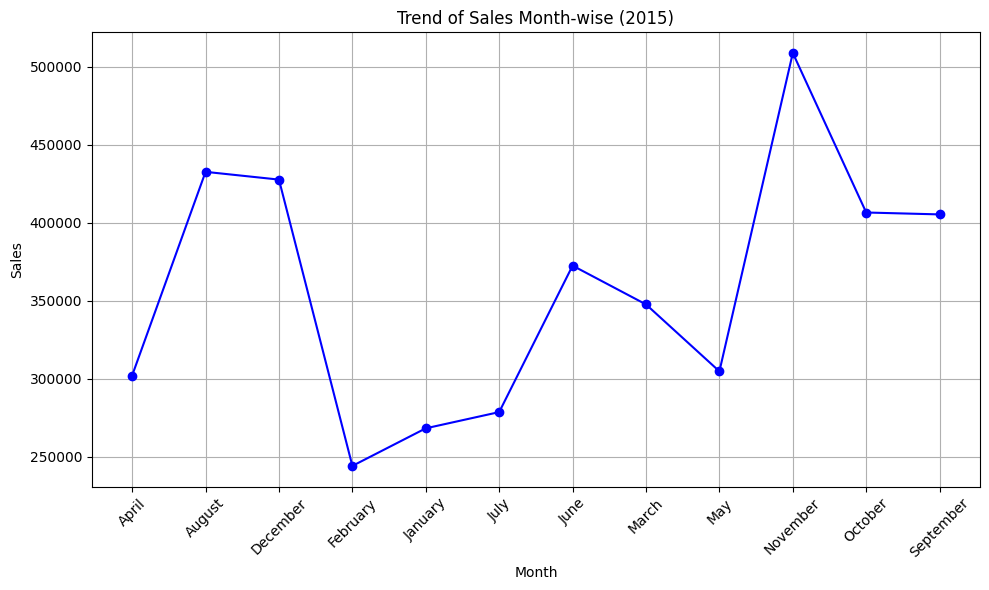

In [61]:
# Plot the trend of sales month-wise for the year 2016
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2015['Month'], monthly_sales_2015['Sales'], marker='o', color='b', linestyle='-')

# Add title and labels
plt.title('Trend of Sales Month-wise (2015)')
plt.xlabel('Month')
plt.ylabel('Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better visualization
plt.grid(True)

# Show the line graph
plt.tight_layout()
plt.show()

### 2.1.3 Distribution of sales across different regions.

In [65]:
df = pd.read_csv('regionalSales.csv')
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()

,Unnamed: 0,Row ID,Product Name,Category,Sub-Category,Order Priority,Country,Region,Sales,Quantity
0,0,40098,Samsung Convoy 3,Technology,Phones,High,United States,Central US,221.98,2
1,1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,Critical,Australia,Oceania,3709.40,9
2,2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,Medium,Australia,Oceania,5175.17,9
3,3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,Medium,Germany,Western Europe,2892.51,5
4,4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,Critical,Senegal,Western Africa,2832.96,8


In [102]:
# Aggregate sales data by region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales

Region
Canada                 66928.17
Caribbean             324280.89
Central Africa        143630.01
Central America      1223100.79
Central Asia           19311.48
Central US            501239.88
Eastern Africa        127856.06
Eastern Asia          855059.62
Eastern Europe        310033.44
Eastern US            678781.36
North Africa          233216.61
Northern Europe       636779.95
Oceania              1100185.69
South America         617223.64
Southeastern Asia     884423.95
Southern Africa       105191.76
Southern Asia         866573.05
Southern Europe       608594.14
Southern US           391721.90
Western Africa        173878.93
Western Asia          317106.95
Western Europe       1731931.05
Western US            725457.93
Name: Sales, dtype: float64

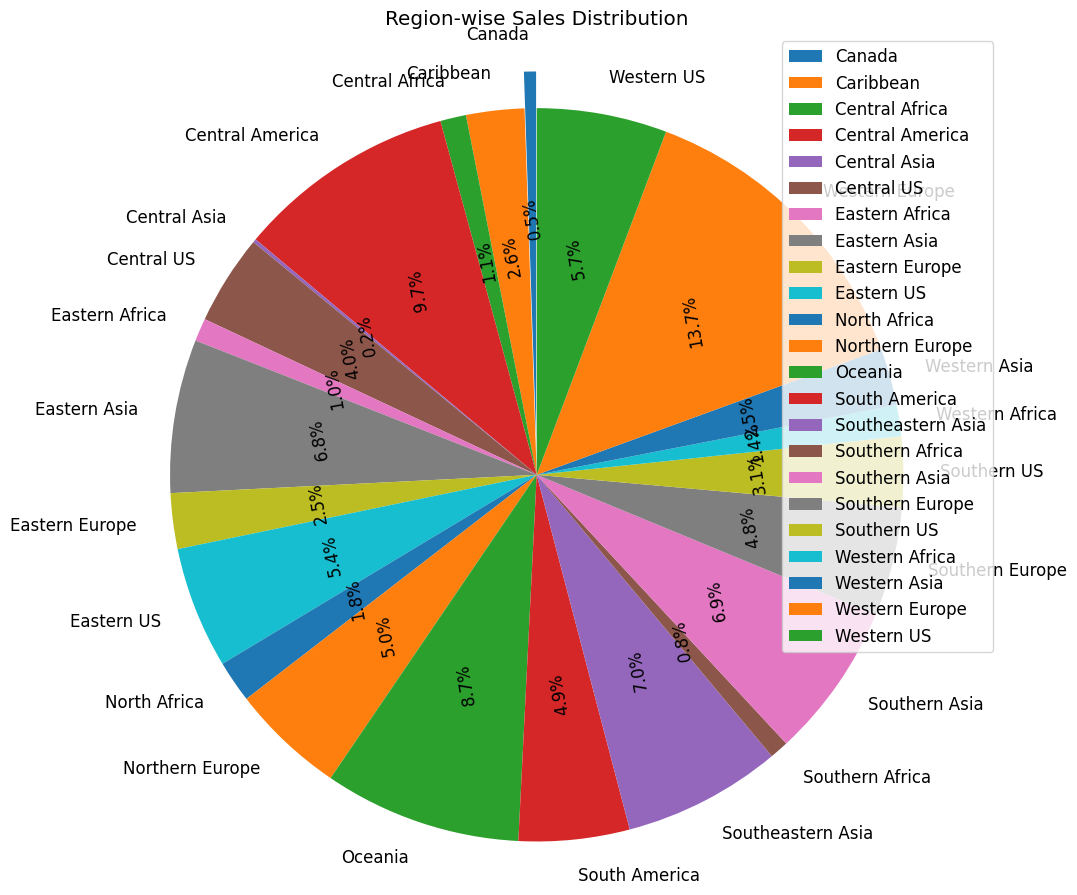

In [187]:

# Plot the pie chart
plt.figure(figsize=(12, 11))
explode = [0.1 if i == 0 else 0 for i in range(len(region_sales))]
pie = plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, explode=explode)

# Rotate percentage data labels by 100 degrees
for text in pie[2]:
    text.set_rotation(100)
plt.title('Region-wise Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc = 'upper right')
plt.rcParams['font.size'] = 12
# Show the pie chart
plt.show()

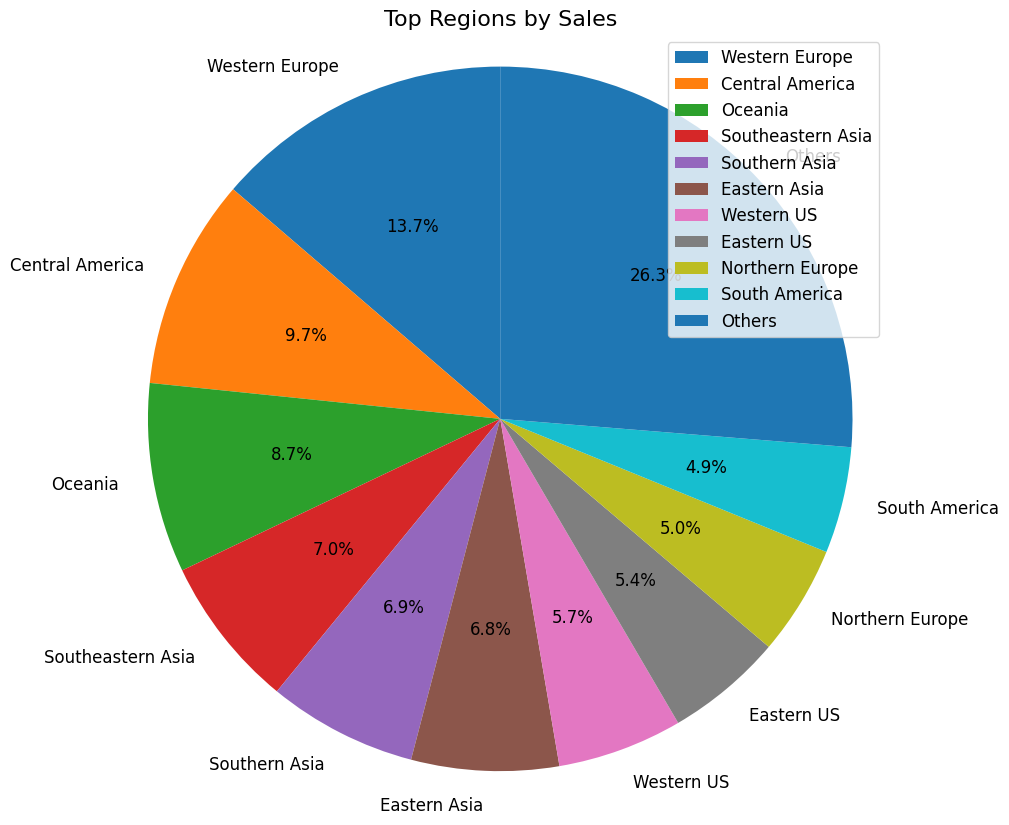

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

#taking the data from region_sales
sales_data = {
    'Region': ['Canada', 'Caribbean', 'Central Africa', 'Central America', 'Central Asia', 'Central US', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Eastern US', 'North Africa', 'Northern Europe', 'Oceania', 'South America', 'Southeastern Asia', 'Southern Africa', 'Southern Asia', 'Southern Europe', 'Southern US', 'Western Africa', 'Western Asia', 'Western Europe', 'Western US'],
    'Sales': [66928.17, 324280.89, 143630.01, 1223100.79, 19311.48, 501239.88, 127856.06, 855059.62, 310033.44, 678781.36, 233216.61, 636779.95, 1100185.69, 617223.64, 884423.95, 105191.76, 866573.05, 608594.14, 391721.90, 173878.93, 317106.95, 1731931.05, 725457.93]
}

# Convert data to DataFrame
df = pd.DataFrame(sales_data)

# Sort DataFrame by Sales in descending order
df = df.sort_values(by='Sales', ascending=False)

# Number of top regions to display
top_n = 10

# Select top N regions and group others
top_regions = df.head(top_n)
other_sales = df.iloc[top_n:]['Sales'].sum()

# Append 'Others' row to top_regions DataFrame
top_regions = pd.concat([top_regions, pd.DataFrame({'Region': ['Others'], 'Sales': [other_sales]})], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_regions['Sales'], labels=top_regions['Region'], autopct='%1.1f%%', startangle=90)

plt.title('Top Regions by Sales', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc = 'upper right')
# Show the pie chart
plt.show()


### 2.1.4 Relationship between Sales and profit (Category-Wise)

In [218]:
df = pd.read_csv("produceWiseProfit.csv")
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
df['Profit'] = df['Profit'].str.replace('$', '').str.replace(',', '').astype(float)
df.head(10)

,Unnamed: 0,Row ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,40098,Samsung Convoy 3,Technology,Phones,221.98,2,0.0,62.15
1,1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,3709.40,9,0.1,-288.77
2,2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,5175.17,9,0.1,919.97
3,3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,2892.51,5,0.1,-96.54
4,4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,2832.96,8,0.0,311.52
5,5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,2862.68,5,0.1,763.28
6,6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,1822.08,4,0.0,564.84
7,7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,5244.84,6,0.0,996.48
8,8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,341.96,2,0.0,54.71
9,9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,48.71,1,0.2,5.48


In [214]:
scatterPlot = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
scatterPlot

,Sub-Category,Sales,Profit
0,Accessories,749237.28,129626.44
1,Appliances,1010535.76,141562.63
2,Art,371613.70,57829.90
3,Binders,461870.09,72432.92
4,Bookcases,1466572.55,161924.37
5,Chairs,1501682.16,140396.24
6,Copiers,1509436.51,258567.63
7,Envelopes,169217.58,28849.26
8,Fasteners,89495.19,13844.08
9,Furnishings,385156.15,46845.56


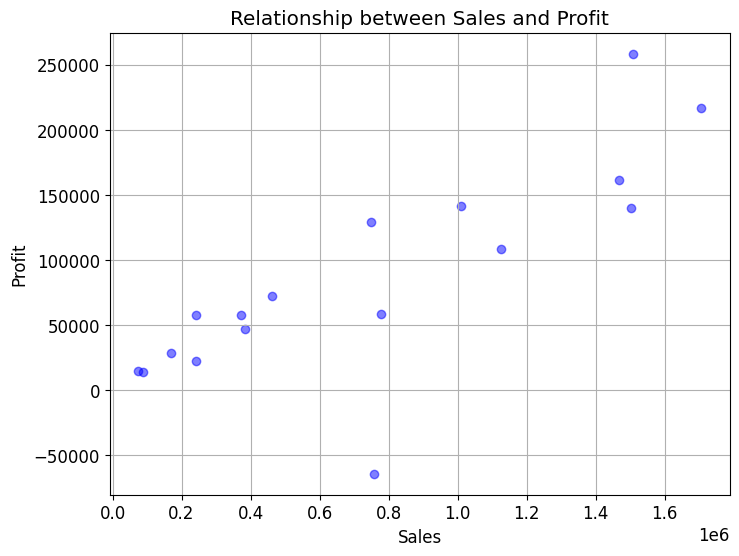

In [217]:
# Extract sales and profit data
sales = scatterPlot['Sales']
profit = scatterPlot['Profit']

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sales, profit, color='blue', alpha=0.5)  # Set alpha to adjust transparency

# Add labels and title
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show the scatter plot
plt.grid(True)
plt.show()

### 2.1.5 Distribution of profit margins. (Category-Wise)

In [227]:
df = scatterPlot.copy()
df['Profit Margin'] = (df['Profit']/df['Sales'])*100
df

,Sub-Category,Sales,Profit,Profit Margin
0,Accessories,749237.28,129626.44,17.301120
1,Appliances,1010535.76,141562.63,14.008671
2,Art,371613.70,57829.90,15.561832
3,Binders,461870.09,72432.92,15.682531
4,Bookcases,1466572.55,161924.37,11.041006
5,Chairs,1501682.16,140396.24,9.349265
6,Copiers,1509436.51,258567.63,17.130077
7,Envelopes,169217.58,28849.26,17.048619
8,Fasteners,89495.19,13844.08,15.469077
9,Furnishings,385156.15,46845.56,12.162745


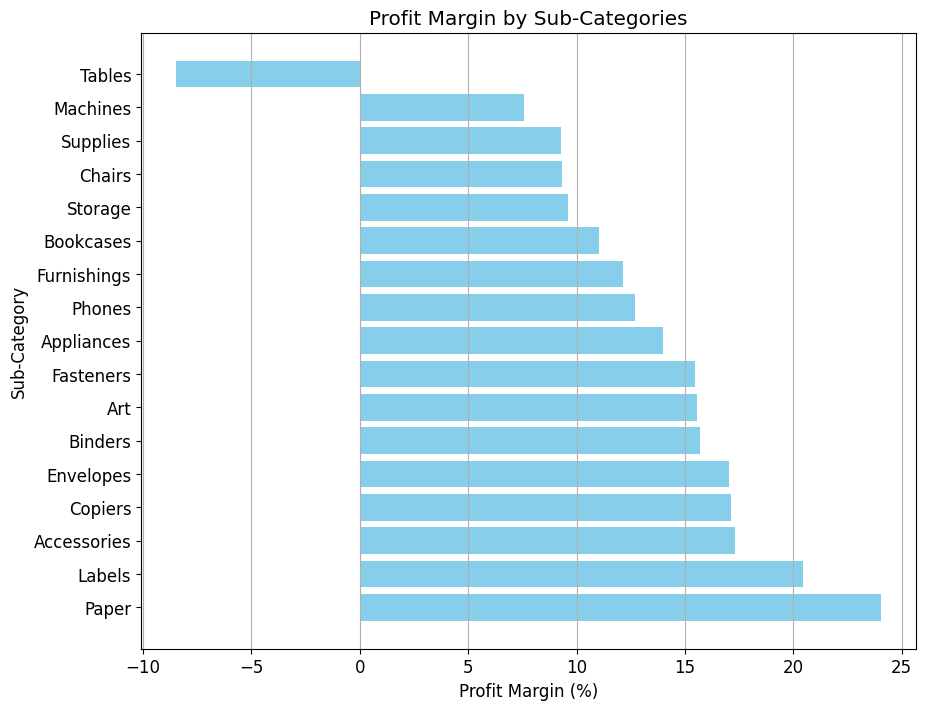

In [244]:
# Sort DataFrame by Profit Margin in descending order
df_sorted = df.sort_values(by='Profit_Margin', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Sub-Category'], df_sorted['Profit_Margin'], color='skyblue')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.title('Profit Margin by Sub-Categories')
plt.grid(axis='x')

# Show the chart
plt.show()


### 2.1.6  Analysis the spread of sales and profit in each category

In [290]:
df = pd.read_csv("produceWiseProfit.csv")
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
df['Profit'] = df['Profit'].str.replace('$', '').str.replace(',', '').astype(float)
df.head(10)

,Unnamed: 0,Row ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,40098,Samsung Convoy 3,Technology,Phones,221.98,2,0.0,62.15
1,1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,3709.40,9,0.1,-288.77
2,2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,5175.17,9,0.1,919.97
3,3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,2892.51,5,0.1,-96.54
4,4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,2832.96,8,0.0,311.52
5,5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,2862.68,5,0.1,763.28
6,6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,1822.08,4,0.0,564.84
7,7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,5244.84,6,0.0,996.48
8,8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,341.96,2,0.0,54.71
9,9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,48.71,1,0.2,5.48


In [293]:
boxPlotData = df.groupby('Category')[['Sales', 'Profit']].mean().reset_index()
boxPlotData

,Category,Sales,Profit
0,Furniture,416.881646,28.913045
1,Office Supplies,121.048786,16.574350
2,Technology,467.859063,65.455005


In [294]:
df = boxPlotData.copy()

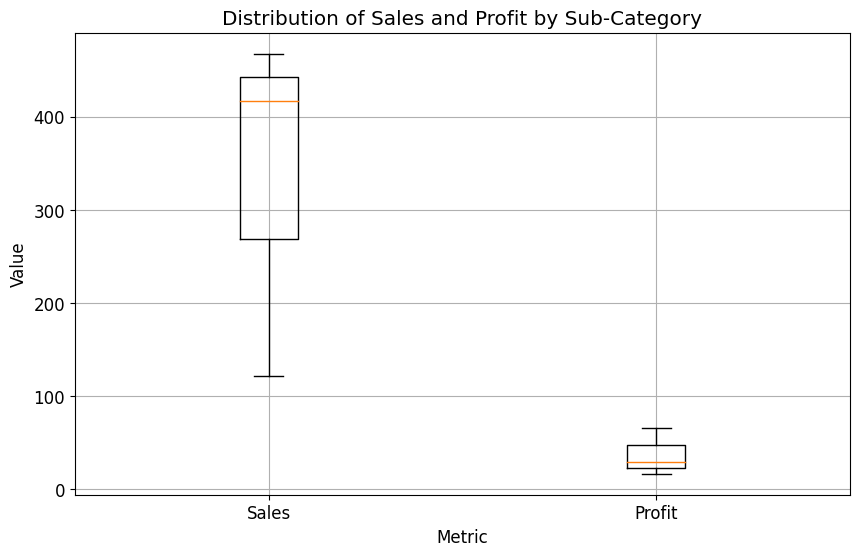

In [295]:
# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df['Sales'], df['Profit']], labels=['Sales', 'Profit'])
plt.title('Distribution of Sales and Profit by Sub-Category')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.grid(True)

# Show the box plot
plt.show()


### 2.1.7  Heatmap: Correlation between numerical features in the dataset.

In [298]:
df = pd.read_csv("produceWiseProfit.csv")
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
df['Profit'] = df['Profit'].str.replace('$', '').str.replace(',', '').astype(float)
df.head(10)

,Unnamed: 0,Row ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,40098,Samsung Convoy 3,Technology,Phones,221.98,2,0.0,62.15
1,1,26341,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,3709.40,9,0.1,-288.77
2,2,25330,"Nokia Smart Phone, with Caller ID",Technology,Phones,5175.17,9,0.1,919.97
3,3,13524,"Motorola Smart Phone, Cordless",Technology,Phones,2892.51,5,0.1,-96.54
4,4,47221,"Sharp Wireless Fax, High-Speed",Technology,Copiers,2832.96,8,0.0,311.52
5,5,22732,"Samsung Smart Phone, with Caller ID",Technology,Phones,2862.68,5,0.1,763.28
6,6,30570,"Novimex Executive Leather Armchair, Adjustable",Furniture,Chairs,1822.08,4,0.0,564.84
7,7,31192,"Chromcraft Conference Table, Fully Assembled",Furniture,Tables,5244.84,6,0.0,996.48
8,8,40099,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,341.96,2,0.0,54.71
9,9,36258,"Global Push Button Manager's Chair, Indigo",Furniture,Chairs,48.71,1,0.2,5.48


In [299]:
newDf = df[['Row ID', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit']]


In [304]:
# Calculate correlation matrix
corr = newDf[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.313577,-0.086722,0.484918
Quantity,0.313577,1.000000,-0.019875,0.104365
Discount,-0.086722,-0.019875,1.000000,-0.316491
Profit,0.484918,0.104365,-0.316491,1.000000


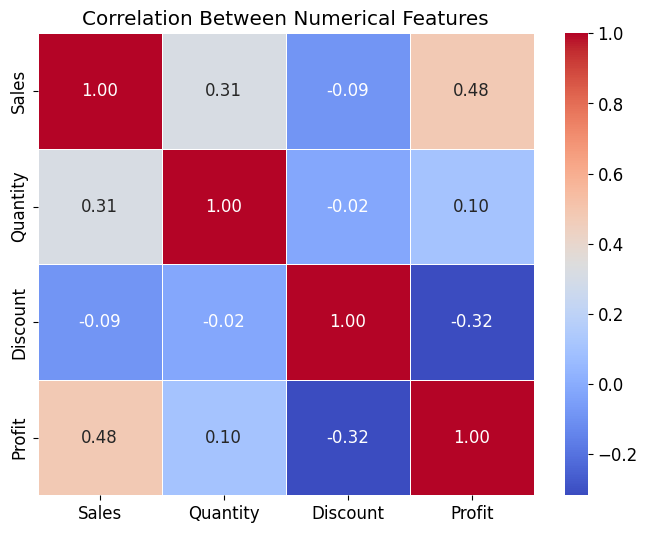

In [301]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Numerical Features')
plt.show()
